In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kmeans-balanced-dataset/yelp_nyc_X_tf_idf_balanced.csv
/kaggle/input/kmeans-balanced-dataset/Наивный Байес_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/Метод ближайших соседей_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/Случайный лес_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/Логистическая регрессия_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/Мини-пакетный метод стохастического градиентного спуска_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/yelp_nyc_y_labels_balanced.csv
/kaggle/input/kmeans-balanced-dataset/Машина опорных векторов_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/yelp_nyc_kmeans_balancing.csv
/kaggle/input/kmeans-balanced-dataset/LogisticRegression с подбором параметров_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/Voting-классификатор_confusion_matrix.png
/kaggle/input/kmeans-balanced-dataset/RandomForest_confusion_matrix.png
/kaggle/input/yelp-nyc-with-pos-

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/kmeans-balanced-dataset/yelp_nyc_kmeans_balancing.csv')
df

,Unnamed: 0.1,Unnamed: 0,user_id,prod_id,review,rating,label,prod_name,date,avg_prod_rating,avg_user_rating,review_len,cnt_reviews,neg,neu,pos,compound,cap_words,digit_words
0,39569,39569,31003,95,"First of all, the wait is super long so be pre...",3.0,1,Ippudo Westside,2014-11-20,4.03,3.50,401,2,0.023,0.625,0.352,0.9834,0,0
1,202817,202817,15455,542,Great pizza.,4.0,1,Lombardi’s Pizza,2012-07-06,3.94,3.74,12,19,0.000,0.196,0.804,0.6249,0,0
2,167376,167376,94480,465,5 starts for the food as its probably the best...,5.0,1,Grimaldi’s,2010-04-17,3.75,4.50,230,2,0.058,0.805,0.137,0.6071,1,1
3,349777,349777,52587,247,"The first time I went here, I went with 8 frie...",5.0,1,Ippudo NY,2012-08-01,4.07,4.20,1741,5,0.055,0.798,0.147,0.9832,7,3
4,84713,84713,56708,243,It's no secret that Roberta's is overpriced gi...,4.0,1,Roberta’s,2013-12-16,3.91,4.00,539,1,0.104,0.750,0.146,0.7569,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72150,358478,358478,161046,921,Bijan is the best bar I have been to in Brookl...,5.0,-1,Bijan’s,2011-12-01,4.17,5.00,244,1,0.055,0.797,0.148,0.6352,0,0
72151,358479,358479,161047,921,Great local lounge spot! After work and regula...,5.0,-1,Bijan’s,2011-11-15,4.17,5.00,169,1,0.000,0.546,0.454,0.9600,0,0
72152,358639,358639,161111,349,First and last time we try this place. Pizza ...,1.0,-1,Emily,2014-03-25,4.19,1.00,866,1,0.079,0.822,0.099,0.4848,6,0
72153,358640,358640,161112,349,"The staff was incredibly nice, the lemonade ta...",3.0,-1,Emily,2014-04-09,4.19,3.00,398,1,0.000,0.834,0.166,0.8460,1,0


In [4]:
indices = np.array(df['Unnamed: 0'])
indices

array([ 39569, 202817, 167376, ..., 358639, 358640, 358641])

In [5]:
df_pos_tag = pd.read_csv('/kaggle/input/yelp-nyc-with-pos-tagging/yelp_NYC_with_pos_features.csv')
df_pos_tag

,Unnamed: 0,user_id,prod_id,review,rating,label,prod_name,date,avg_prod_rating,avg_user_rating,...,RBR,JJS,UH,NNPS,PDT,RBS,FW,LS,SYM,WP$
0,0,1133,1,My wife and I took my parents there for lunch ...,1.0,-1,Peppino’s,2013-12-21,4.33,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1134,1,Got a margarita pizza. First off let me say ve...,1.0,-1,Peppino’s,2013-11-25,4.33,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1135,1,The food is average pizzeria and not cheap. A...,2.0,-1,Peppino’s,2014-07-24,4.33,3.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1136,1,I can not fathom why people would give this re...,2.0,-1,Peppino’s,2014-03-05,4.33,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1137,1,Went here during the time it was busy and i go...,3.0,-1,Peppino’s,2014-11-21,4.33,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358742,358742,161146,349,"I'm very spoiled with Pizza. Really, I have tr...",5.0,1,Emily,2014-02-06,4.19,5.00,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
358743,358743,116424,349,Can't say enough good things about this place....,5.0,1,Emily,2014-01-31,4.19,5.00,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
358744,358744,161147,349,"Had a great dinner here- fantastic pizza, the ...",5.0,1,Emily,2014-01-30,4.19,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358745,358745,97930,349,"Great foods and great drinks, they have even p...",5.0,1,Emily,2014-01-25,4.19,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_pos_tag = df_pos_tag.loc[indices]

In [7]:
df_pos_tag

,Unnamed: 0,user_id,prod_id,review,rating,label,prod_name,date,avg_prod_rating,avg_user_rating,...,RBR,JJS,UH,NNPS,PDT,RBS,FW,LS,SYM,WP$
39569,39569,31003,95,"First of all, the wait is super long so be pre...",3.0,1,Ippudo Westside,2014-11-20,4.03,3.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202817,202817,15455,542,Great pizza.,4.0,1,Lombardi’s Pizza,2012-07-06,3.94,3.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167376,167376,94480,465,5 starts for the food as its probably the best...,5.0,1,Grimaldi’s,2010-04-17,3.75,4.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349777,349777,52587,247,"The first time I went here, I went with 8 frie...",5.0,1,Ippudo NY,2012-08-01,4.07,4.20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
84713,84713,56708,243,It's no secret that Roberta's is overpriced gi...,4.0,1,Roberta’s,2013-12-16,3.91,4.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358478,358478,161046,921,Bijan is the best bar I have been to in Brookl...,5.0,-1,Bijan’s,2011-12-01,4.17,5.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
358479,358479,161047,921,Great local lounge spot! After work and regula...,5.0,-1,Bijan’s,2011-11-15,4.17,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358639,358639,161111,349,First and last time we try this place. Pizza ...,1.0,-1,Emily,2014-03-25,4.19,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358640,358640,161112,349,"The staff was incredibly nice, the lemonade ta...",3.0,-1,Emily,2014-04-09,4.19,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_pos_tag.columns

Index(['Unnamed: 0', 'user_id', 'prod_id', 'review', 'rating', 'label',
       'prod_name', 'date', 'avg_prod_rating', 'avg_user_rating', 'review_len',
       'cnt_reviews', 'neg', 'neu', 'pos', 'compound', 'cap_words',
       'digit_words', 'noun_count', 'PRP$', 'NN', 'CC', 'PRP', 'VBD', 'NNS',
       'EX', 'IN', 'VBN', 'DT', 'VBG', 'RB', 'CD', 'JJ', 'WP', 'TO', 'VB',
       'RP', 'VBP', 'MD', 'NNP', 'VBZ', 'WDT', 'WRB', 'JJR', 'POS', 'RBR',
       'JJS', 'UH', 'NNPS', 'PDT', 'RBS', 'FW', 'LS', 'SYM', 'WP$'],
      dtype='object')

In [9]:
features = ['rating', 'avg_prod_rating', 'avg_user_rating', 
            'review_len', 'cnt_reviews', 'neg', 'pos', 'neu',
            'cap_words', 'digit_words', 'noun_count', 'PRP$', 'NN', 'CC', 'PRP', 'VBD', 'NNS',
       'EX', 'IN', 'VBN', 'DT', 'VBG', 'RB', 'CD', 'JJ', 'WP', 'TO', 'VB',
       'RP', 'VBP', 'MD', 'NNP', 'VBZ', 'WDT', 'WRB', 'JJR', 'POS', 'RBR',
       'JJS', 'UH', 'NNPS', 'PDT', 'RBS', 'FW', 'LS', 'SYM', 'WP$']            

In [10]:
X, Y = df_pos_tag[features],  df_pos_tag['label']
X

,rating,avg_prod_rating,avg_user_rating,review_len,cnt_reviews,neg,pos,neu,cap_words,digit_words,...,RBR,JJS,UH,NNPS,PDT,RBS,FW,LS,SYM,WP$
39569,3.0,4.03,3.50,401,2,0.023,0.352,0.625,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202817,4.0,3.94,3.74,12,19,0.000,0.804,0.196,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167376,5.0,3.75,4.50,230,2,0.058,0.137,0.805,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349777,5.0,4.07,4.20,1741,5,0.055,0.147,0.798,7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
84713,4.0,3.91,4.00,539,1,0.104,0.146,0.750,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358478,5.0,4.17,5.00,244,1,0.055,0.148,0.797,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
358479,5.0,4.17,5.00,169,1,0.000,0.454,0.546,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358639,1.0,4.19,1.00,866,1,0.079,0.099,0.822,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358640,3.0,4.19,3.00,398,1,0.000,0.166,0.834,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(57724, 47) (14431, 47) (57724,) (14431,)


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
y_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def show_metrics(y_true, y_pred, title):
    print(f'''
                {title}
==========================================
 auc: {roc_auc_score(y_true, y_pred)}             
==========================================
 report:                                
{classification_report(y_true, y_pred)}
==========================================    ''') 


def show_confusion_matrix(y_true, y_pred, title_string):
    conf = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,8))
    plt.title(title_string)
    sns.heatmap(conf, fmt='d', annot=True)
    plt.savefig(title_string+'_confusion_matrix.png')
    plt.show()

def compute_metrics(y_true, y_pred):
    print("AUC:", roc_auc_score(y_true, y_pred))  
    print("Accuracy:", accuracy_score(y_true, y_pred))  
    print("Precision:", precision_score(y_true, y_pred))  
    print("Recall:", recall_score(y_true, y_pred))  
    print("F1-score:", f1_score(y_true, y_pred))  
        


                Логистическая регрессия
 auc: 0.7028430376034027             
 report:                                
              precision    recall  f1-score   support

          -1       0.68      0.81      0.74      7368
           1       0.75      0.60      0.67      7063

    accuracy                           0.71     14431
   macro avg       0.71      0.70      0.70     14431
weighted avg       0.71      0.71      0.70     14431



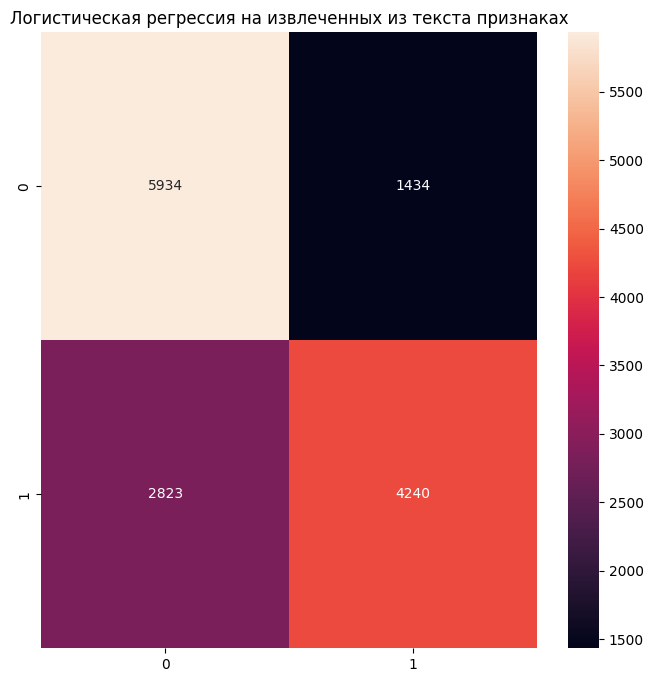

AUC: 0.7028430376034027
Accuracy: 0.7050100478137343
Precision: 0.7472682410997532
Recall: 0.6003114823729293
F1-score: 0.6657768705346627


In [16]:
show_metrics(y_test, y_pred, 'Логистическая регрессия')
show_confusion_matrix(y_test, y_pred, 'Логистическая регрессия на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)


In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred = dt.predict(X_test)


                Дерево решений
 auc: 0.6905741148032836             
 report:                                
              precision    recall  f1-score   support

          -1       0.70      0.69      0.70      7368
           1       0.68      0.69      0.69      7063

    accuracy                           0.69     14431
   macro avg       0.69      0.69      0.69     14431
weighted avg       0.69      0.69      0.69     14431



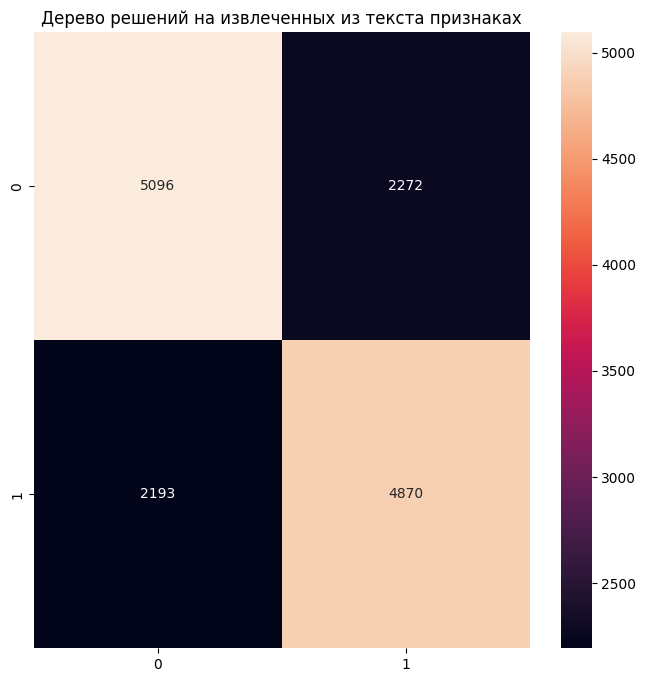

AUC: 0.6905741148032836
Accuracy: 0.6905966322500173
Precision: 0.6818818258190983
Recall: 0.6895087073481524
F1-score: 0.6856740584301302


In [19]:
show_metrics(y_test, y_pred, 'Дерево решений')
show_confusion_matrix(y_test, y_pred, 'Дерево решений на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(X_test)


                Случайный лес
 auc: 0.753709229775206             
 report:                                
              precision    recall  f1-score   support

          -1       0.73      0.82      0.77      7368
           1       0.79      0.68      0.73      7063

    accuracy                           0.76     14431
   macro avg       0.76      0.75      0.75     14431
weighted avg       0.76      0.76      0.75     14431



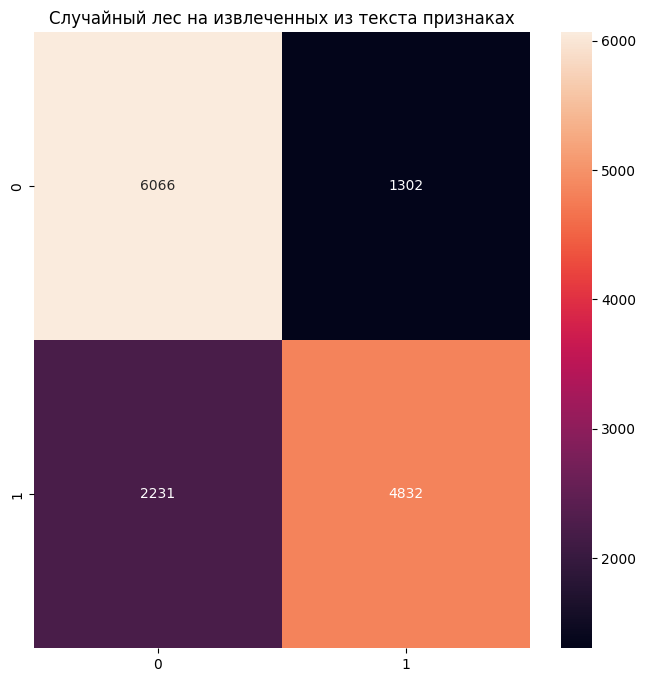

AUC: 0.753709229775206
Accuracy: 0.7551798212182108
Precision: 0.7877404629931529
Recall: 0.6841285572702818
F1-score: 0.73228764113056


In [22]:
show_metrics(y_test, y_pred, 'Случайный лес')
show_confusion_matrix(y_test, y_pred, 'Случайный лес на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [24]:
y_pred = sgd.predict(X_test)


                Градиентный спуск
 auc: 0.700530199893221             
 report:                                
              precision    recall  f1-score   support

          -1       0.67      0.82      0.74      7368
           1       0.76      0.58      0.66      7063

    accuracy                           0.70     14431
   macro avg       0.71      0.70      0.70     14431
weighted avg       0.71      0.70      0.70     14431



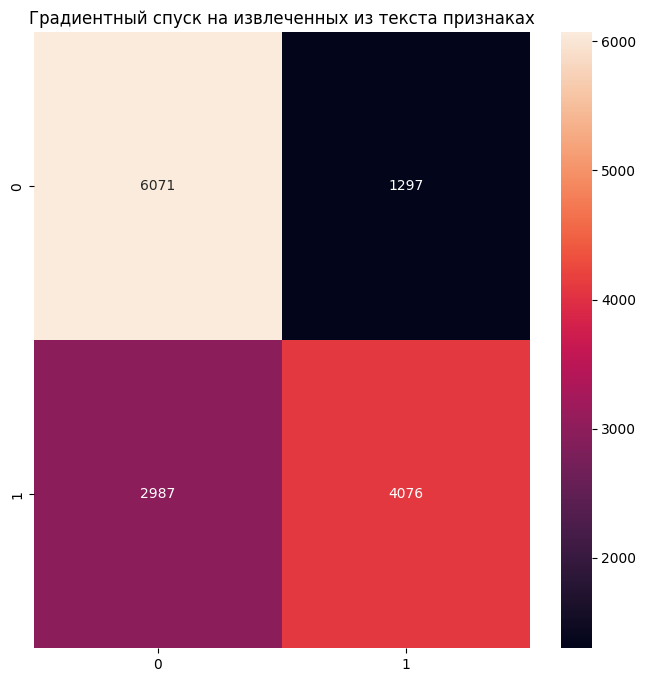

AUC: 0.700530199893221
Accuracy: 0.7031390756011364
Precision: 0.758607854085241
Recall: 0.5770918873000142
F1-score: 0.6555162431650049


In [25]:
show_metrics(y_test, y_pred, 'Градиентный спуск')
show_confusion_matrix(y_test, y_pred, 'Градиентный спуск на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)

In [26]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)


GaussianNB()

In [27]:
y_pred = bayes.predict(X_test)


                Наивный Байес
 auc: 0.617437075164838             
 report:                                
              precision    recall  f1-score   support

          -1       0.59      0.83      0.69      7368
           1       0.70      0.40      0.51      7063

    accuracy                           0.62     14431
   macro avg       0.64      0.62      0.60     14431
weighted avg       0.64      0.62      0.60     14431



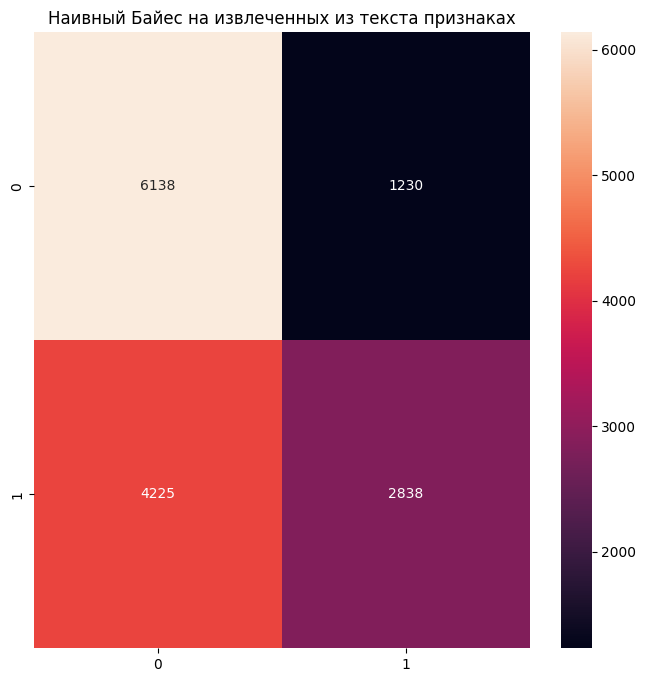

AUC: 0.617437075164838
Accuracy: 0.6219943177880951
Precision: 0.6976401179941003
Recall: 0.4018122610788617
F1-score: 0.5099272302578385


In [28]:
show_metrics(y_test, y_pred, 'Наивный Байес')
show_confusion_matrix(y_test, y_pred, 'Наивный Байес на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

boosting = HistGradientBoostingClassifier()

boosting.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [30]:
y_pred = boosting.predict(X_test)


                Градиентный бустинг
 auc: 0.7876479356798585             
 report:                                
              precision    recall  f1-score   support

          -1       0.77      0.84      0.80      7368
           1       0.82      0.73      0.77      7063

    accuracy                           0.79     14431
   macro avg       0.79      0.79      0.79     14431
weighted avg       0.79      0.79      0.79     14431



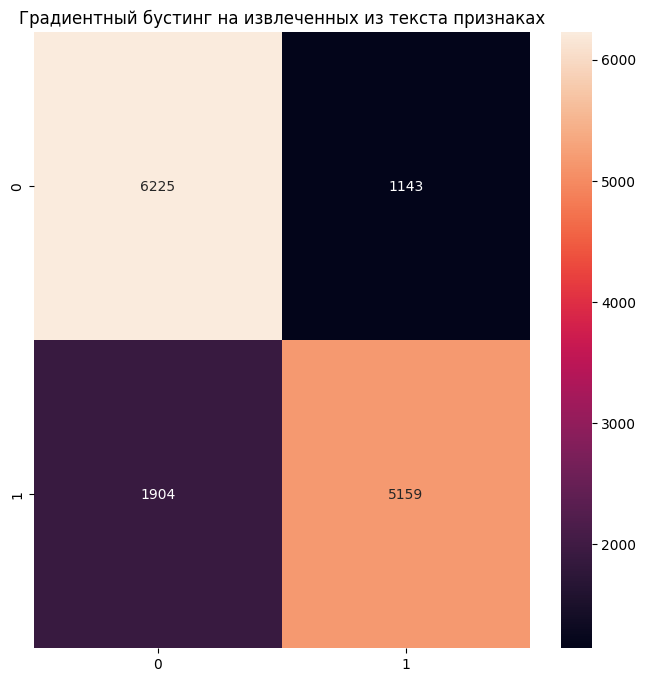

AUC: 0.7876479356798585
Accuracy: 0.7888573210449726
Precision: 0.818629006664551
Recall: 0.7304261645193261
F1-score: 0.7720164609053498


In [31]:
show_metrics(y_test, y_pred, 'Градиентный бустинг')
show_confusion_matrix(y_test, y_pred, 'Градиентный бустинг на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu', solver='adam', early_stopping=True)
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64))

In [33]:
y_pred = mlp.predict(X_test)



                Нейронная сеть
 auc: 0.7462064219450109             
 report:                                
              precision    recall  f1-score   support

          -1       0.73      0.81      0.77      7368
           1       0.78      0.68      0.73      7063

    accuracy                           0.75     14431
   macro avg       0.75      0.75      0.75     14431
weighted avg       0.75      0.75      0.75     14431



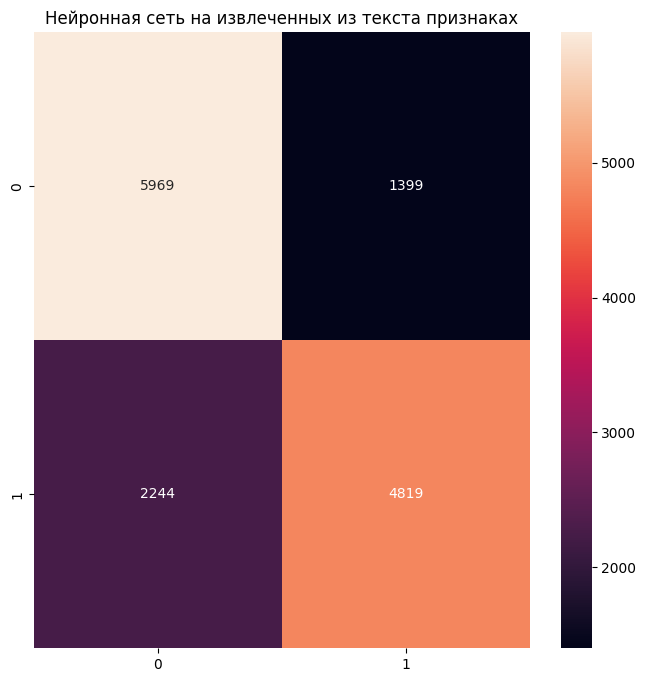

AUC: 0.7462064219450109
Accuracy: 0.7475573418335527
Precision: 0.7750080411707945
Recall: 0.6822879796120629
F1-score: 0.725698366086891


In [34]:
show_metrics(y_test, y_pred, 'Нейронная сеть')
show_confusion_matrix(y_test, y_pred, 'Нейронная сеть на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)


AdaBoostClassifier()

In [36]:
y_pred = ada.predict(X_test)


                AdaBoost
 auc: 0.7529049378457231             
 report:                                
              precision    recall  f1-score   support

          -1       0.74      0.79      0.77      7368
           1       0.76      0.72      0.74      7063

    accuracy                           0.75     14431
   macro avg       0.75      0.75      0.75     14431
weighted avg       0.75      0.75      0.75     14431



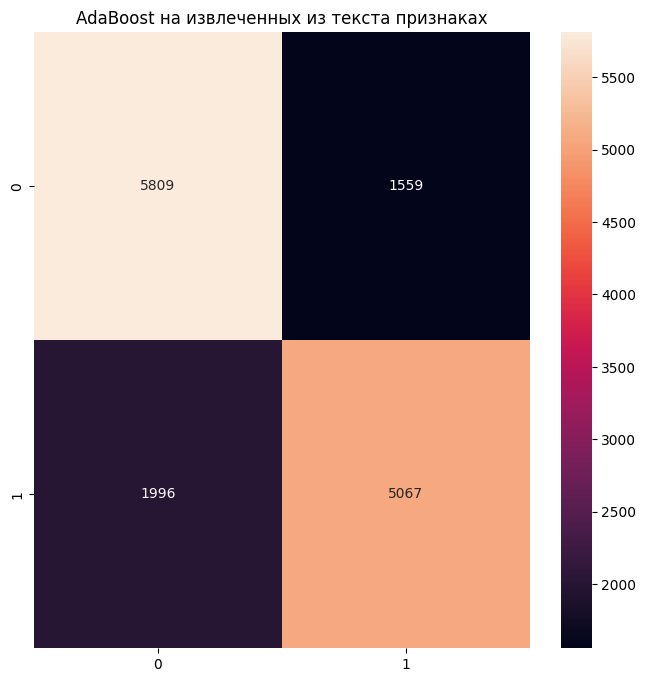

AUC: 0.7529049378457231
Accuracy: 0.7536553253412792
Precision: 0.764714760036221
Recall: 0.7174005380150078
F1-score: 0.7403024326101248


In [37]:
show_metrics(y_test, y_pred, 'AdaBoost')
show_confusion_matrix(y_test, y_pred, 'AdaBoost на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)

In [38]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [39]:
y_pred = svc.predict(X_test)


                SVC
 auc: 0.7245670576414565             
 report:                                
              precision    recall  f1-score   support

          -1       0.70      0.83      0.76      7368
           1       0.77      0.62      0.69      7063

    accuracy                           0.73     14431
   macro avg       0.73      0.72      0.72     14431
weighted avg       0.73      0.73      0.72     14431



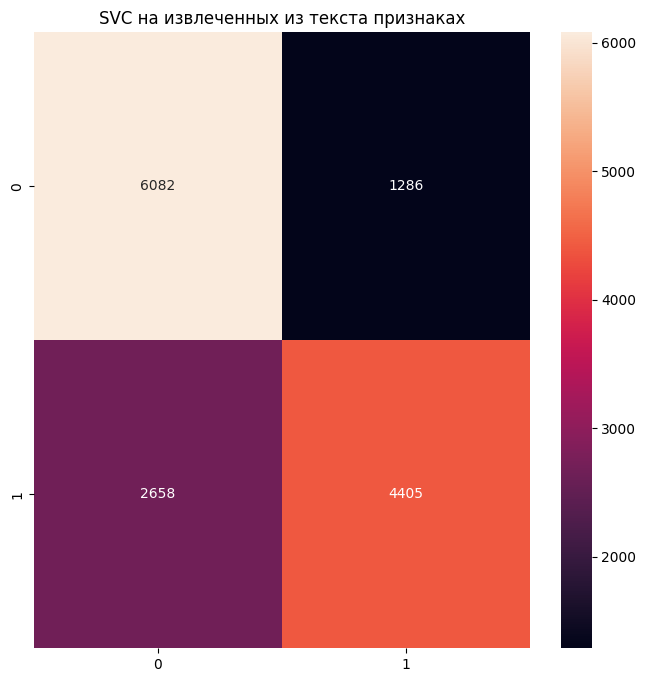

AUC: 0.7245670576414565
Accuracy: 0.7266994664264431
Precision: 0.7740291688631172
Recall: 0.6236726603426306
F1-score: 0.6907636819821233


In [40]:
show_metrics(y_test, y_pred, 'SVC')
show_confusion_matrix(y_test, y_pred, 'SVC на извлеченных из текста признаках')
compute_metrics(y_test, y_pred)